In [34]:
%matplotlib inline

import numpy
import random
import matplotlib.pyplot as plt

In [74]:
class Lever:
    def __init__(self):
        self.q_star = numpy.random.normal(0, 1)
        self.q_est = 0
        self.n = 0
        
    def getR(self):
        return numpy.random.normal(self.q_star, 1)
    
    def updateQest(self, reward):
        self.n = self.n + 1
        self.q_est = (self.q_est*(self.n -1) + reward) / self.n

In [147]:
class Bandit:
    def __init__(self):
        self.levers = []
        self.k = 10
        self.rewards = []
        
        for i in range(0,self.k):
            self.levers.append(Lever())
    
    def getOptimal(self):
        return numpy.argmax(list(map(lambda l: l.q_star, self.levers)))
    
    def getQest(self):
        return list(map(lambda l: l.q_est, self.levers))
    
    def pickRandomAction(self):
        leverIndex = random.randint(0, 9)
        lever = self.levers[leverIndex]
        reward = lever.getR()
        
        # keep reward for statistics
        self.rewards.append(reward)
        
        lever.updateQest(reward)
        
        return reward, leverIndex
    
    def pickGreedyAction(self):
        leverIndex = numpy.argmax(bandit.getQest())
        lever = self.levers[leverIndex]
        reward = lever.getR()
        
        # keep reward for statistics
        self.rewards.append(reward)
        
        lever.updateQest(reward)
        
        return reward, leverIndex
        
        

In [166]:
def calculateAvg(rewards): 
    accumulator = []
    numberOfRuns = len(rewards)
    
    for i in range(0, len(rewards)):
        for j in range(0, len(rewards[i])):
            if j >= len(accumulator):
                accumulator.append(rewards[i][j])
            else :
                accumulator[j] += rewards[i][j]

    averageRewards = list(map(lambda x : x / numberOfRuns, accumulator))
    
    return averageRewards

In [157]:
rewards = []
optimalActionsRatios = []
for j in range(0, 2000):
    print("Epoch " + str(j)) if j % 200
    
    rewards.append([])
    bandit = Bandit()
    
    optimalAction = bandit.getOptimal()
    optimalActionsRatios.append([])
    for i in range(0, 1000):
        reward, levelIndex = bandit.pickGreedyAction()    
        rewards[j].append(reward)
        
        optimalActionsRatios[j].append(1 if levelIndex == optimalAction else 0)
        


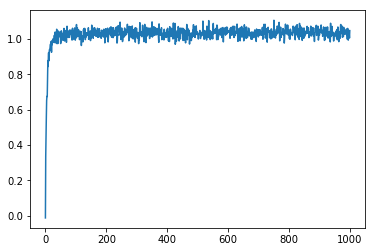

In [168]:
plt.plot(numpy.arange(1000),calculateAvg(rewards), label='greedy')


plt.show()

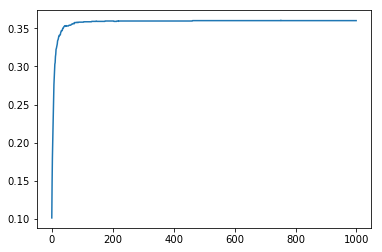

In [167]:
plt.plot(numpy.arange(1000),calculateAvg(optimalActionsRatios), label='optimal')


#plt.plot(numpy.arange(1000),calculateAvg(rewards), label='greedy')

plt.show()

In [173]:
epsilon = 0.01
rewards001 = []
optimalActionsRatios001 = []

for j in range(0, 2000):
    if j % 200 == 0:
        print("Epoch " + str(j))
    rewards001.append([])
    bandit = Bandit()
    
    optimalAction = bandit.getOptimal()
    optimalActionsRatios001.append([])
    for i in range(0, 1000):
        if random.random() <= epsilon:
            reward, levelIndex = bandit.pickRandomAction()
        else:
            reward, levelIndex = bandit.pickGreedyAction()    
        rewards001[j].append(reward)
        
        optimalActionsRatios001[j].append(1 if levelIndex == optimalAction else 0)

Epoch 0
Epoch 200
Epoch 400
Epoch 600
Epoch 800
Epoch 1000
Epoch 1200
Epoch 1400
Epoch 1600
Epoch 1800


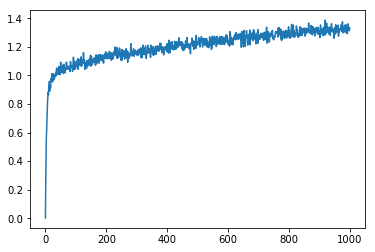

In [174]:
plt.plot(numpy.arange(1000),calculateAvg(rewards001), label='greedy')

plt.show()

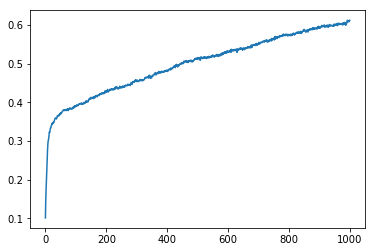

In [175]:
plt.plot(numpy.arange(1000),calculateAvg(optimalActionsRatios001), label='optimal')


#plt.plot(numpy.arange(1000),calculateAvg(rewards), label='greedy')

plt.show()

In [176]:
epsilon = 0.1
rewards01 = []
optimalActionsRatios01 = []

for j in range(0, 2000):
    if j % 200 == 0:
        print("Epoch " + str(j))
    rewards01.append([])
    bandit = Bandit()
    
    optimalAction = bandit.getOptimal()
    optimalActionsRatios01.append([])
    for i in range(0, 1000):
        if random.random() <= epsilon:
            reward, levelIndex = bandit.pickRandomAction()
        else:
            reward, levelIndex = bandit.pickGreedyAction()    
        rewards01[j].append(reward)
        
        optimalActionsRatios01[j].append(1 if levelIndex == optimalAction else 0)

Epoch 0
Epoch 200
Epoch 400
Epoch 600
Epoch 800
Epoch 1000
Epoch 1200
Epoch 1400
Epoch 1600
Epoch 1800


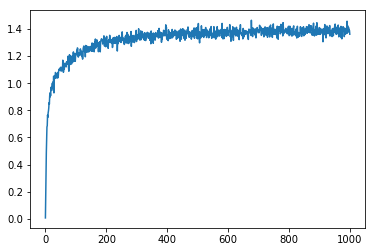

In [177]:
plt.plot(numpy.arange(1000),calculateAvg(rewards01), label='greedy')

plt.show()

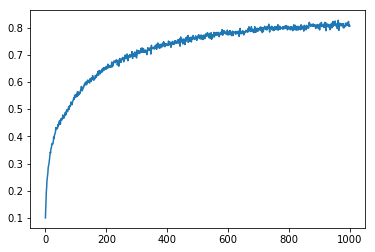

In [178]:
plt.plot(numpy.arange(1000),calculateAvg(optimalActionsRatios01), label='greedy')

plt.show()

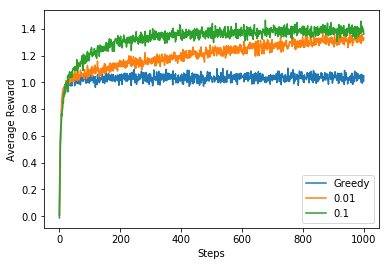

In [181]:
plt.plot(numpy.arange(1000), calculateAvg(rewards), label='Greedy')
plt.plot(numpy.arange(1000), calculateAvg(rewards001), label='0.01')
plt.plot(numpy.arange(1000), calculateAvg(rewards01), label='0.1')

plt.xlabel('Steps')
plt.ylabel('Average Reward')

plt.legend()

plt.show()

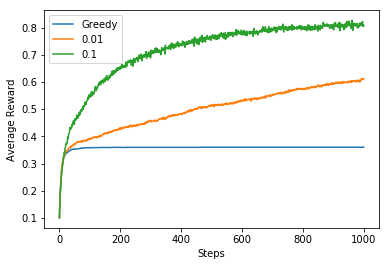

In [180]:
plt.plot(numpy.arange(1000), calculateAvg(optimalActionsRatios), label='Greedy')
plt.plot(numpy.arange(1000), calculateAvg(optimalActionsRatios001), label='0.01')
plt.plot(numpy.arange(1000), calculateAvg(optimalActionsRatios01), label='0.1')

plt.xlabel('Steps')
plt.ylabel('Average Reward')

plt.legend()

plt.show()